# Keras for MNIST data

## Importing data

In [1]:
import matplotlib.pyplot as plt 

from keras.datasets import mnist 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


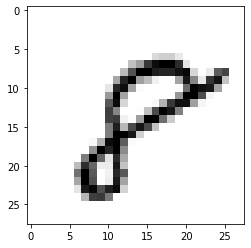

In [2]:
plt.imshow(train_images[-1], cmap = plt.cm.binary)
plt.show()

In [3]:
train_size = train_images.shape[0]
test_size = test_images.shape[0]

img_dim1 = train_images.shape[1]
img_dim2 = train_images.shape[2]

print(train_size, test_size, img_dim1, img_dim2)

60000 10000 28 28


## Preparing data

In [4]:
from keras.utils import to_categorical

In [5]:
train_images = train_images.reshape((train_size, img_dim1 * img_dim2))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((test_size, img_dim1 * img_dim2))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Setting up model 

In [6]:
from keras import models 
from keras import layers

In [7]:
network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28, )))
network.add(layers.Dense(10, activation = 'softmax'))

In [8]:
network.compile(optimizer = 'adam', 
               loss = 'categorical_crossentropy', 
               metrics = ['accuracy'])

In [9]:
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.2636 - accuracy: 0.9257
Epoch 2/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.1058 - accuracy: 0.9694
Epoch 3/5
60000/60000 [==============================] - 6s 101us/step - loss: 0.0700 - accuracy: 0.9793
Epoch 4/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.0497 - accuracy: 0.9856
Epoch 5/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.0360 - accuracy: 0.9897


In [10]:
test_loss, test_accuracy = network.evaluate(test_images, test_labels)
print('test_accuracy : ', test_accuracy)

10000/10000 [==============================] - 0s 38us/step
test_accuracy :  0.9793999791145325
